In [70]:
# importing required libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [71]:
# loading the dataset
name = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
dataset = pd.read_csv('iris.csv')

In [72]:
# checking data is loaded
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
# dimensions of dataset
dataset.shape

(150, 5)

In [74]:
# statistical measures of the dataset
dataset.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
# class distribution
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

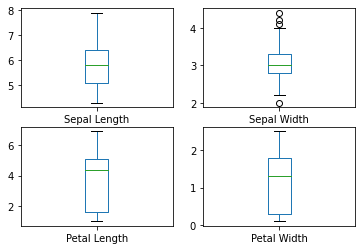

In [76]:
# univariate plots - box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

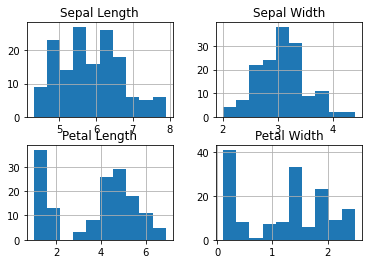

In [77]:
# histogram of the dataset
dataset.hist()
pyplot.show()

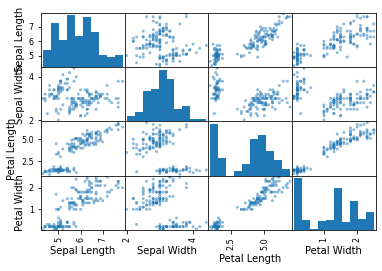

In [78]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [79]:
# creating a validation dataset
# splitting dataset
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

In [80]:
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [81]:
# array that contains all columns except Species column
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
# array that contains only species column
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [83]:
# Logistic Regression
# Linear Discriminant Analysis
# K-Nearest neighbors
# Classification and Regression Trees
# Gaussian Naive Bayes
# Support Vector Machines

#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [84]:
# evaluate the created models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


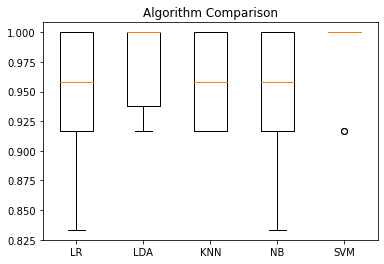

In [85]:
# comparing our models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [86]:
# make predictions on svm
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict (X_validation)

In [87]:
# evaluate our predictions
print (accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

